# 🐕 End-to-End Multi-class Dog breed Classification

This notebook builds an end to end multi class image classifier using Tensorflow 2.0 and Tensorflow Hub.

## 1. Problem Statement

Identifying the breed of a dog given an image of the dog.

When I am sitting at a Cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we are using is from ->https://www.kaggle.com/c/dog-breed-identification/data

## 3.Evaluation

The evaluation is a file with prediction probability for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We are dealing with Images(unstructured data) so it's probably best we use Deep Learning/Transfer Learning.
* There are 120 dog breeds( this means that there are 120 classes).
* There are around 10,000 + images in test and train sets.

### Get our Workspace ready

* Import Tensorflow 2.x.
* Import Tensorflow Hub.
* Make sure that you are using a GPU.

In [141]:
# Import necessary tools

import tensorflow_hub as hub
import tensorflow as tf
print(f'tensorflow version {tf.__version__}')
print(f'tensorflowhub version {hub.__version__}')

# Check for GPU availability

print("GPU","available(YESSS!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

tensorflow version 2.2.0
tensorflowhub version 0.8.0
GPU available(YESSS!!!)


## Getting our Data Ready or turning it into Tensors

With all Machine Learning Models,our data has to be in Numerical Format. So that's what we are doing first, turning our images into Tensors.

let's start with accesing our data and checking out the labels.

In [142]:
# Check out the labels of our data
import pandas as pd
labels_csv=pd.read_csv('drive/My Drive/Dog-Vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     234f291c3808ab3518d8dc4ca9201fa1  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [143]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


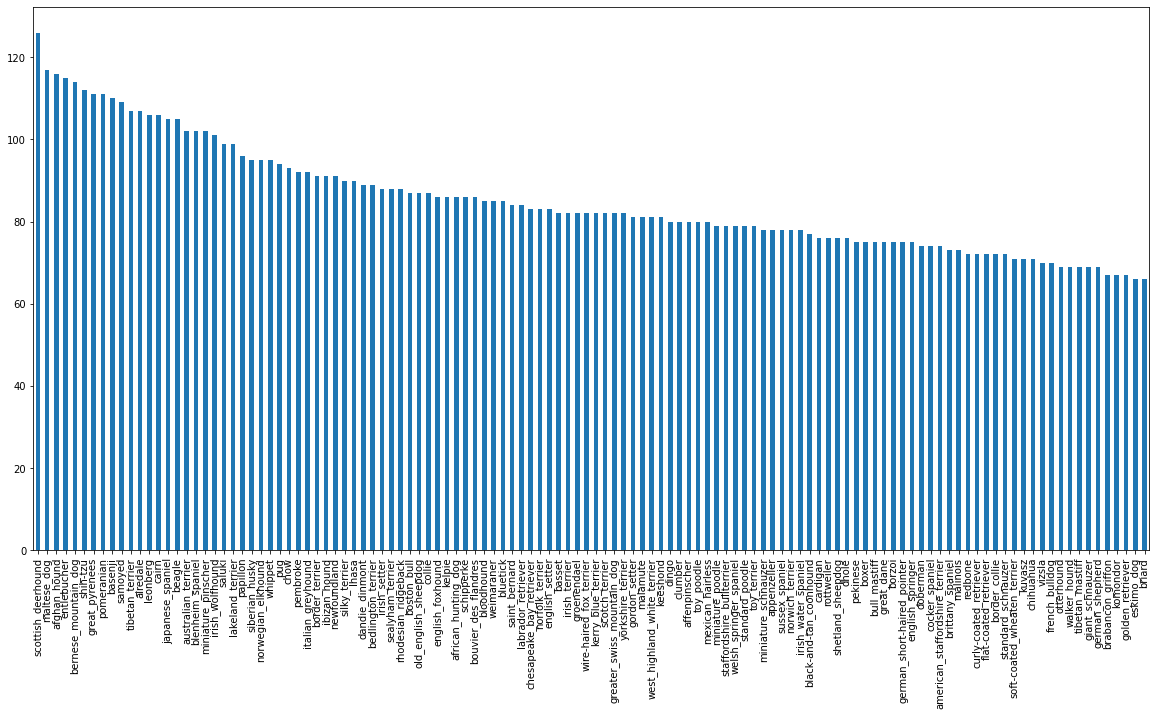

In [144]:
# How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10));

In [145]:
labels_csv.breed.value_counts().median()

82.0

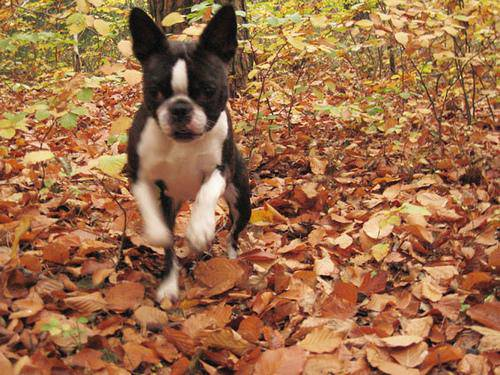

In [146]:
#Let's view an image
from IPython.display import Image
Image('drive/My Drive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

### Getting Images and their Labels.

Let's get a list of all of our image file pathnames.

In [147]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [148]:
# Create pathnames from image id's
filenames=['drive/My Drive/Dog-Vision/train/'+fname+'.jpg' for fname in labels_csv['id']]

# Check the first 10
filenames[:10]

['drive/My Drive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [149]:
import os
os.listdir('drive/My Drive/Dog-Vision/train')[:10]

['eaea761df48d7adef74af9c66a0fbf4c.jpg',
 'f0efab499435ecd4e634b72f539fde9b.jpg',
 'f1842cfc3bdbf485847574cb1b133d29.jpg',
 'ea18d9dba21ed0af962a29cbca958bb8.jpg',
 'f48432fa098e002cc0d21d1258633697.jpg',
 'f59d3ddb3652e870bea7cb3b15894708.jpg',
 'ed756805b14606580f9740ba00feb0fe.jpg',
 'ea9134791fb20bce0b72caabfa0947a6.jpg',
 'f27b4323bae39abf810bcd145d8de276.jpg',
 'eed0a81e48da6883e1f3f248b3d398f2.jpg']

In [150]:
# check whether number of filenames matched number of actual files
import os 
if len(os.listdir('drive/My Drive/Dog-Vision/train')) == len(filenames):
  print("Filenames match actual amount of files, Proceed!")
else:
  print("Filenames does not matches actual amount of files")

Filenames match actual amount of files, Proceed!


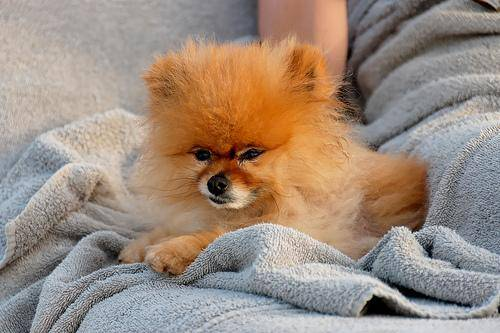

In [151]:
# One more Check
Image(filenames[8000])

Since we've now got all of our filepaths in a list, so let's prepare our labels.

In [152]:
import numpy as np

labels=labels_csv['breed'].to_numpy()
#labels=np.array(labels) #does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [153]:
len(labels)

10222

In [154]:
# See if numbers of labels matches the number of filenames
if len(labels)==len(filenames):
  print("Number of labels matches number of filenames")
else :
  print('Number of labels does not matches number of filenames, check data dictionary')

Number of labels matches number of filenames


In [155]:
# Find the unique label values
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [156]:
# Turn a single label into an array of Booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [157]:
# Turn every label into a boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [158]:
len(boolean_labels)

10222

In [159]:
# Example: Turning boolean array into Integers

print(labels[0]) #original label
print(np.where(unique_breeds==labels[0])) #index where labels occur
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be 1 where a sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [160]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own Validation Set.

Since the data from Kaggle doesn't comes with a Validation Set, so we will form it on our own.

In [161]:
# Setup X and y variables

X=filenames
y=boolean_labels

In [162]:
len(filenames)

10222

We are going to experiment with 1000 images first and then we will scale it.

In [163]:
# Set number of Images to use with Experimenting.

NUM_IMAGES=1000 #@param{type:'slider',min:1000,max:10000,step:1000}

In [164]:
# Let's split our data into train and validation sets

from sklearn.model_selection import train_test_split

#Split them into training and validation size of NUM_IMAGES
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [165]:
# Let's have a geez at training data
X_train[:2],y_train[:2]

(['drive/My Drive/Dog-Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog-Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, F

## Pre-processing Images(turning Images into Tensors)

To pre-process our images into tensors, we are going to write a Function.
1. Take an Image filepath as input.
2. Use Tensorflow to read the file and save it to a variable 'image'.
3. Turn our 'image' into tensors.
4. Resize the 'image' to be a shape of (224,224).
5. Return the Modified 'image'.

Before we do it, let's see what an imported image looks like.

In [166]:
# Convert images to Numpy array
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape


(257, 350, 3)

In [167]:
image.max(),image.min()

(255, 0)

In [168]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [169]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we have seen what an image looks like as a tensor, now let's make a function to process them--

    Take an Image filepath as input.
    Use Tensorflow to read the file and save it to a variable 'image'.
    Turn our 'image' into tensors.
    Normalise our Image.
    Resize the 'image' to be a shape of (224,224).
    Return the Modified 'image'.


In [170]:
# Define image size
IMG_SIZE=224

# Create a function for pre-processing images

def process_image(image_path,img_size=IMG_SIZE):
  '''
  Takes an Image file Path and turns the image into tensor.
  '''

  # Read in an image file
  image=tf.io.read_file(image_path)

  # Turn the jpg image to tensors with 3 color channels(RGB)
  image=tf.image.decode_jpeg(image,channels=3)

  # Convert the Color Channels values from 0-255 to 0-1 (Normalization)
  image=tf.image.convert_image_dtype(image,tf.float32)

  # Resize the Modified Image
  image=tf.image.resize(image,size=(224,224))

  return image

## Turning our Data into Batches

Why turn our data into batches?

Let's say you are trying to process 10,000+ images in one go...they all might not fit
into memory.

So that's why we do about 32 images(Batch Size) a time, you can manually adjust it if need be.

In order to use TensorFlow effectively, we need our data in the form of 
Tensor tuples which look like this:
(image,label)

In [171]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label


In [172]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [173]:
get_image_label(filenames[23],tf.constant(boolean_labels[23]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.85505086, 0.9299633 , 0.92662823],
         [0.81137955, 0.8680409 , 0.87331927],
         [0.65585613, 0.7117472 , 0.72351193],
         ...,
         [0.9862923 , 1.        , 0.94612277],
         [0.98783255, 1.        , 0.96510875],
         [0.9843138 , 1.        , 0.9686275 ]],
 
        [[0.90201336, 0.96589917, 0.96203256],
         [0.6755214 , 0.7345071 , 0.734637  ],
         [0.3105466 , 0.35756877, 0.36488315],
         ...,
         [0.97476614, 0.98050165, 0.94970876],
         [0.9842786 , 0.9984056 , 0.97540545],
         [0.98680484, 0.99697757, 0.9817803 ]],
 
        [[0.9601525 , 0.99129385, 0.982579  ],
         [0.68598783, 0.7250213 , 0.71138334],
         [0.2921741 , 0.32173467, 0.32030183],
         ...,
         [0.9958709 , 0.99332947, 0.99219996],
         [0.9956618 , 0.99824065, 0.9963235 ],
         [0.99748373, 0.9966649 , 0.9973658 ]],
 
        ...,
 
        [[0.9354203 , 0.91764134

Now we've got a way to turn our data into tuples of tensors
in the form of (image,label). Let's make a function that turns all of our data('X' and 'y')
into batches.

In [174]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch



In [175]:
# Create training and validation data batches

train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True) 

Creating training data batches...
Creating validation data batches...


In [176]:
# Check out the different attributes of our data batches

train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is in batches now, but these can be a little hard to
understand/comprehend hence let's visualise them.

In [177]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[y[i].argmax()])
    # Turn gird lines off
    plt.axis("off")


In [178]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [179]:
# Visualize training images from the training data batch
train_images= next(train_data.as_numpy_iterator())
train_labels= next(train_data.as_numpy_iterator())




In [180]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

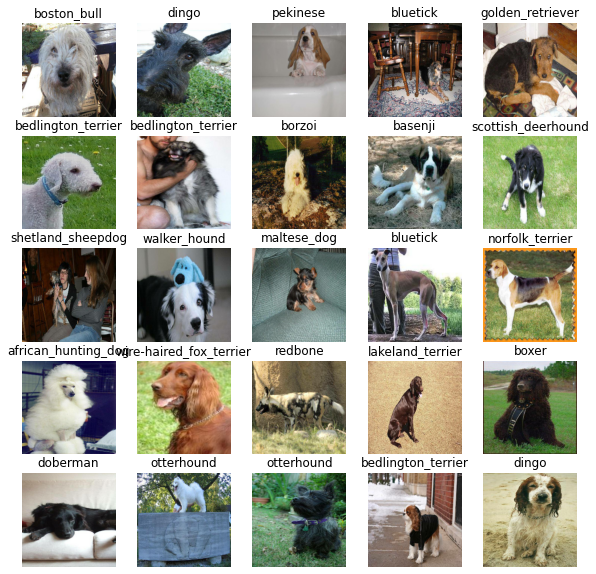

In [181]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)


In [182]:
unique_breeds[y[0].argmax()]

'boston_bull'

## Building a Model

Before we build a model, there are a few things we need to define--
1. Input shape (Image shape) in the form of tensors to our model.
2. Output shape (Image labels) in the form of tensors of our model.
3. The URL of the model we wish to use from Tensorflow Hub-> https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [183]:
IMG_SIZE

224

In [184]:


# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"



In [185]:
INPUT_SHAPE

[None, 224, 224, 3]

Now we've got our input,outputs and model ready to go.

So let's put them together into a Keras Deep Learning Model!

Knowing this,let's create a function which--
* Takes the input shape,ouput shape and the model which we have choosen as paramters.
* Define the layers in a Keras Model in sequential fashion.
* Compiles the Model. (says how it should be evaluated and improved)
* Builds the Model. (Tells the model the input shape it will be getting)
* Returns the Model.

All these steps can be found here-> https://www.tensorflow.org/guide/keras/overview#import_tfkeras

In [186]:
#  Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [187]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_4 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [188]:
outputs=np.ones(shape=(1,1,1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

## Creating Callbacks

These are helper function which a model can use during training to do things such as saving its progress,
checks its progress or stop training it if it ain't improving.

We will create 2 callbacks-
* For TensorBoard which helps us track our model.
* Another for Early stopping which helps us from further training our model for too long.

## TensorBoard Callback

To set up a TensorBoard Callback, we need to do 3 things--
* Load the TensorBoard Notebook Extension.
* Create a TensorBoard Callback which is able to save logs to
a directory and pass it to our model's fit function.
*  Visualise our model's training log with a '%tensorboard' magic function( we will do it after training)

In [189]:
# Load TensorBoard Callback
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [190]:


import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)



### Early Stopping Callback
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

Helps stops our model from overfitting by stopping training if certain evaluation metric stops improving.

In [191]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements



## Training a Model (on a subset)

Our first model is going to train only on a 1000 images to make sure that it is working.

In [192]:
NUM_EPOCHS= 100 #@param{type:'slider',min:10,max:100,step:10}

Let's create a function which trains a model.

* Create a model using create_model.
* Setup a TensorBoard Callback using create_tensorboard_callback.
* Call the 'fit()' function on our model passing it the training data,validation data, number of epoch and the callback functions.
* Return the Model.

In [193]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [194]:
# Fit the model to the data
model = train_model()



Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
 2/25 [=>............................] - ETA: 7s - loss: 5.6028 - accuracy: 0.0312    WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.253701). Check your callbacks.


25/25 [==============================] - 7s 266ms/step - loss: 4.6138 - accuracy: 0.1000 - val_loss: 3.4728 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 6s 232ms/step - loss: 1.6741 - accuracy: 0.6525 - val_loss: 2.1658 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 6s 232ms/step - loss: 0.5621 - accuracy: 0.9450 - val_loss: 1.6840 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 6s 231ms/step - loss: 0.2503 - accuracy: 0.9912 - val_loss: 1.4912 - val_accuracy: 0.6050
Epoch 5/100
25/25 [==============================] - 6s 229ms/step - loss: 0.1433 - accuracy: 0.9975 - val_loss: 1.3966 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 6s 245ms/step - loss: 0.0978 - accuracy: 0.9987 - val_loss: 1.3523 - val_accuracy: 0.6250
Epoch 7/100
25/25 [==============================] - 6s 237ms/step - loss: 0.0740 - accuracy: 1.0000 - val_loss: 1.3212 - val_accuracy: 0.6250
Epoch 8/100

* Question -> It looks as if our model is overfitting as it is performing way better on our training set as compared to validation set,
what are some ways to present Model Overfitting in Deep Learning.

* Note -> Overfitting to begin with is a good thing, it means that our model is learning!!!

### Checking the TensorBoard Logs

The TensorBoard magic function ('%tensorboard') will access the log directory we created earlier and visualise it's contents.

In [195]:
%load_ext tensorboard
%tensorboard --logdir drive/\My/ Drive/Dog-Vision/logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2020-06-18 13:11:00.194252: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import]
                   [--inspect] [--version_tb] [--tag TAG] [--event_file PATH]
                   [--path_prefix PATH] [--window_title TEXT]
                   [--max_reload_threads COUNT] [--reload_interval SECONDS]
                   [--reload_task TYPE] [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--debugger_data_server_grpc_port PORT]
                   [--debugger_port PORT]
                   {se

## Making and Evaluating Predictions using our Trained Model

In [196]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [197]:
model

In [ ]:
|